# ECBM E4040 - Assignment 2 - Task 4: Data Augmentation

One important factor in neural network training is the size of the traininig set. Since it is often not possible to get a clean and large enough dataset for training, one way to improve the network's robustness and generalization ability is to create 'fake' data by injecting random noise or doing random transformations on the available data. A technique which implements this strategy is called __data augmentation__, and has shown to be very effective.

One thing to remember, when you augment your data, is to never change the correct label of a sample. For example, for hand-written digit dataset, flipping a letter 'b' ends up looking like a letter 'd', but you must keep the label for 'b'. So please choose the best augmentation methods for your dataset.

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

# Import modules
from __future__ import print_function
import numpy as np
from ecbm4040.cifar_utils import load_data
import matplotlib.pyplot as plt

## Load Data

In [85]:
X_train, y_train, X_test, y_test = load_data()

num_train = 49000 
num_val = 1000
num_test = 10000
num_dev = 128

# The development set is used for augmentation practices.
mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Seperate Training set into a training set and a validation set
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]



# Preprocessing: subtract the mean value across every dimension for training data, and reshape it to be RGB size
mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image




print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
(49000, 3072) (1000, 3072) (10000, 3072) (128, 3072)


## Part 1: Visualization

### Visualize some original images

<span style="color:red">__TODO:__</span> Use Pyplot to draw any 16 samples from the __development set__ in a 4-by-4 grid.

__Hint__: The original data is vectorized, you need to find a way to reshape it into 32*32 RGB image.

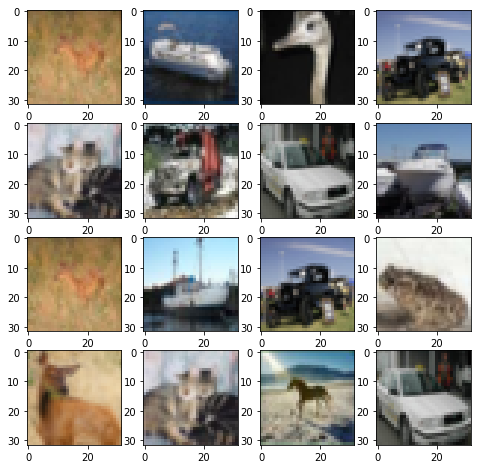

In [43]:
r = 4
f, axarr = plt.subplots(r, r, figsize=(8,8))

for i in range(r):
    for j in range(r):

        img_flat = X_dev[np.random.choice(X_dev.shape[0],1),:].flatten()
        img_R = img_flat[0:1024].reshape((32, 32))
        img_G = img_flat[1024:2048].reshape((32, 32))
        img_B = img_flat[2048:3072].reshape((32, 32))
        img = np.dstack((img_R, img_G, img_B))
        axarr[i][j].imshow(img)


## Part 2: Automatic batch generator

We want you to create an automatic image generator that does several kinds of data augmentations, and produces a batch of data consisting of random samples every time you call it. 

<span style="color:red">__TODO__:</span> Finish the functions of class __ImageGenerator__ in __ecbm4040/image_generator.py__. The code is fully commented with instructions.

__Hint__: The python keywords __yield__ and __next__ can help you do some tricks.

In [35]:
from ecbm4040.image_generator import ImageGenerator

<span style="color:red">__TODO__:</span> Create an ImageGenerator object using the __development set__, and use __show__ function to plot the top 16 original images.

In [53]:
def reshapeImg(X,idx):
    img_flat = X[idx,:].flatten()
    img_R = img_flat[0:1024].reshape((32, 32)) / 255
    img_G = img_flat[1024:2048].reshape((32, 32)) / 255
    img_B = img_flat[2048:3072].reshape((32, 32)) /255
    img = np.dstack((img_R, img_G, img_B))
    return img

def reshapeArray(X):
    container = np.ndarray((X.shape[0],32,32,3))
    for n in range(X.shape[0]):
        container[n] = reshapeImg(X,n)

    return container



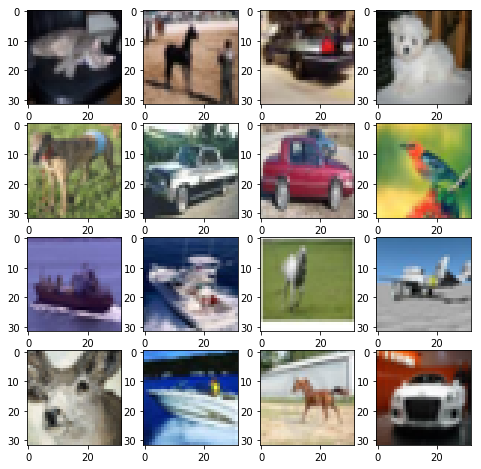

In [70]:
dev_gen = ImageGenerator(reshapeArray(X_dev) , y_dev)
dev_gen.show()

### Translation

<span style="color:red">__TODO:__</span> Translate the original __development set__ by several pixels in both directions, and plot the top 16 images like you just did.

In [ ]:
del dev_gen
dev_gen = ImageGenerator(reshapeArray(X_dev), y_dev)

dev_gen.translate(shift_height=10, shift_width= -10)

dev_gen.show()

### Rotation

<span style="color:red">__TODO:__</span> Rotate the original __development set__ by several degrees, and plot the top 16 images like you just did. 

In [ ]:
# YOUR CODE HERE
del dev_gen
dev_gen = ImageGenerator(reshapeArray(X_dev), y_dev)

dev_gen.rotate(angle=-1)

dev_gen.show()

### Flipping (horizontal and vertical)

<span style="color:red">__TODO:__</span> Flip the original __development set__ as you like (horizontal, vertical, or both), and plot the top 16 images like you just did. 

In [ ]:
# YOUR CODE HERE
del dev_gen
dev_gen = ImageGenerator(reshapeArray(X_dev), y_dev)

dev_gen.flip(mode= 'hv')

dev_gen.show()

### Add Noise

<span style="color:red">__TODO:__</span> Inject random noise into the original __development set__, and plot the top 16 images like you just did.

In [ ]:
# YOUR CODE HERE
del dev_gen
dev_gen = ImageGenerator(reshapeArray(X_dev), y_dev)

#normally distributed 
dev_gen.add_noise(portion=.05, amplitude=.5)
dev_gen.show()

## Part 3: Data Augmentation + LeNet

<span style="color:red">__TODO__:</span> Now that you have your own data generator. At the end of __ecbm4040/neuralnets/cnn.py__, there is a not-implemented function __my_training_task4()__. Copy the __my_training()__ function above and modify it so that it uses your data generator for training. Train the network again - whether you see and improvement or a drop, record it and analyze why.

In [202]:
## Reloading the data so it's clean and unaltered. 

X_train, y_train, X_test, y_test = load_data()

num_train = 49000 
num_val = 1000
num_test = 10000
num_dev = 128

# The development set is used for augmentation practices.
mask = np.random.choice(num_train, num_dev, replace=False)
X_dev = X_train[mask]
y_dev = y_train[mask]

# Seperate Training set into a training set and a validation set
X_val = X_train[num_train:]
y_val = y_train[num_train:]
X_train = X_train[:num_train]
y_train = y_train[:num_train]



# Preprocessing: subtract the mean value across every dimension for training data, and reshape it to be RGB size
mean_image = np.mean(X_train, axis=0)
X_train = X_train.astype(np.float32) - mean_image.astype(np.float32)
X_val = X_val.astype(np.float32) - mean_image




print(X_train.shape, X_val.shape, X_test.shape, X_dev.shape)

./data/cifar-10-python.tar.gz already exists. Begin extracting...
(49000, 3072) (1000, 3072) (10000, 3072) (128, 3072)


In [203]:
X_train     = reshapeArray(X_train)
X_val       = reshapeArray(X_val)

Train_X_Gen = ImageGenerator(X_train, y_train)



In [196]:
test = Train_X_Gen.next_batch_gen(batch_size=250, shuffle=True)
for i in range(1000):
    next(test)

    

shuffled!
shuffled!
shuffled!
shuffled!
shuffled!


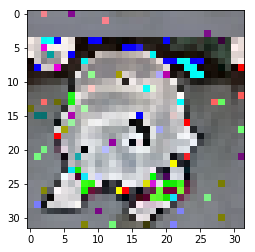

In [193]:
z = next(test)

plt.imshow(z[0][0])


In [163]:
reindex = np.random.permutation(X_train.shape[0])

Shuffled = X_train[reindex]

reindex[0]

34863

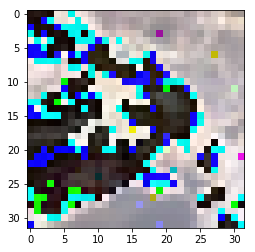

array([[[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       ..., 
       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True]],

       [[ True,  True,  True],
        [ True,  True,  True],
        [ True,  True,  True],
        ..., 
        [ True,  True,  True],
        [ True,  True,  True],
        [ 

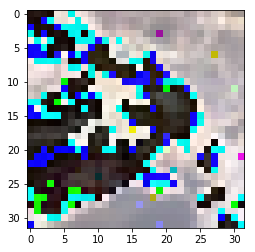

In [165]:
plt.imshow((X_train[reindex[1],:,:,:]))
plt.show()

plt.imshow(Shuffled[1,:,:,:])

#X_train[reindex[1],:,:,:] == Shuffled[1,:,:,:]

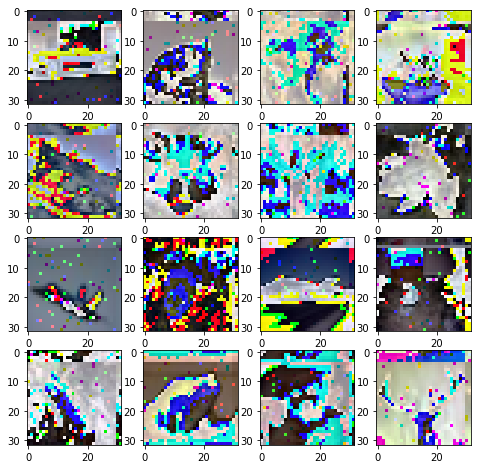

In [161]:
mod = True
## mod the images
if mod:
    Train_X_Gen.add_noise(portion = .01, amplitude = .04)
    #Train_X_Gen.rotate(angle = -1)
    Train_X_Gen.translate(shift_height=2, shift_width= -1 )

## Looks funny because mean was subtracted
Train_X_Gen.show()

In [205]:
from ecbm4040.neuralnets.cnn import my_training_generator
import tensorflow as tf


tf.reset_default_graph()
result , cache = my_training_task4(Train_X_Gen, X_val, y_val, 
             conv_featmap=[10],
             fc_units=[84, 84],
             conv_kernel_size=[5],
             pooling_size=[2],
             l2_norm= .0001,
             seed=235,
             use_adam = True,
             learning_rate= .001,
             epoch=20,
             batch_size=245,
             verbose=False,
             pre_trained_model= 'lenet_1509670317')  # using a relatively successful model from task 3

# YOUR CODE HERE

Building my LeNet. Parameters: 
conv_featmap=[10]
fc_units=[84, 84]
conv_kernel_size=[5]
pooling_size=[2]
l2_norm=0.0001
seed=235
learning_rate=0.001
number of batches for training: 200
Load the model from: lenet_1509670317
INFO:tensorflow:Restoring parameters from model/lenet_1509670317
epoch 1 
Best validation accuracy! iteration:100 accuracy: 45.4%
Best validation accuracy! iteration:200 accuracy: 51.9%
epoch 2 
Best validation accuracy! iteration:300 accuracy: 55.5%
Best validation accuracy! iteration:400 accuracy: 58.3%
epoch 3 
Best validation accuracy! iteration:500 accuracy: 59.1%
Best validation accuracy! iteration:600 accuracy: 60.0%
epoch 4 
Best validation accuracy! iteration:700 accuracy: 60.4%
Best validation accuracy! iteration:800 accuracy: 60.8%
epoch 5 
Best validation accuracy! iteration:900 accuracy: 61.6%
Best validation accuracy! iteration:1000 accuracy: 61.9%
epoch 6 
Best validation accuracy! iteration:1100 accuracy: 62.8%
epoch 7 
Best validation accuracy! iter

In [206]:




tf.reset_default_graph()
result , cache = my_training_task4(Train_X_Gen, X_val, y_val, 
             conv_featmap=[10],
             fc_units=[84, 84],
             conv_kernel_size=[5],
             pooling_size=[2],
             l2_norm= .0001,
             seed=235,
             use_adam = True,
             learning_rate= .001,
             epoch=20,
             batch_size=245,
             verbose=False,
             pre_trained_model= None)



Building my LeNet. Parameters: 
conv_featmap=[10]
fc_units=[84, 84]
conv_kernel_size=[5]
pooling_size=[2]
l2_norm=0.0001
seed=235
learning_rate=0.001
number of batches for training: 200
epoch 1 
Best validation accuracy! iteration:100 accuracy: 44.2%
Best validation accuracy! iteration:200 accuracy: 46.8%
epoch 2 
Best validation accuracy! iteration:300 accuracy: 53.4%
epoch 3 
Best validation accuracy! iteration:500 accuracy: 56.3%
Best validation accuracy! iteration:600 accuracy: 57.1%
epoch 4 
Best validation accuracy! iteration:700 accuracy: 59.2%
Best validation accuracy! iteration:800 accuracy: 60.1%
epoch 5 
Best validation accuracy! iteration:900 accuracy: 60.2%
Best validation accuracy! iteration:1000 accuracy: 61.1%
epoch 6 
Best validation accuracy! iteration:1100 accuracy: 61.6%
Best validation accuracy! iteration:1200 accuracy: 62.1%
epoch 7 
Best validation accuracy! iteration:1300 accuracy: 63.0%
epoch 8 
Best validation accuracy! iteration:1500 accuracy: 63.2%
epoch 9 


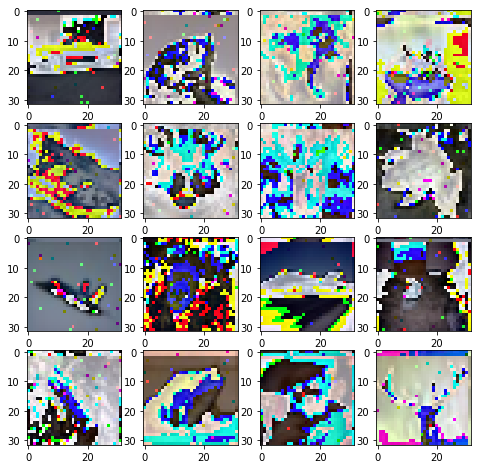

In [207]:
mod = True
## mod the images
if mod:
    Train_X_Gen.add_noise(portion = .01, amplitude = .04)
    #Train_X_Gen.rotate(angle = -1)
    Train_X_Gen.translate(shift_height=2, shift_width= -1 )

## Looks funny because mean was subtracted
Train_X_Gen.show()

In [208]:

kernel_sizes = [2, 5 ,10]
l2_penalties = [.00001, .0001 , .001, .01]
learning_rates = [1e-4, 1e-2, 1e-1]
batch_sizes    = [75, 150, 250, 400]
pooling_size   = [1, 2, 5, 7, 10]
conv_features  = [ 3, 6, 10 ]

results = list()
parameters = list()

for i in range(40):
    
    tf.reset_default_graph()
    k = np.random.choice(kernel_sizes)
    l = np.random.choice(l2_penalties)
    r = np.random.choice(learning_rates)
    b = np.random.choice(batch_sizes)
    p = np.random.choice(pooling_size)
    f = np.random.choice(conv_features)

    print('iteration ' + str(i) + ': \n')
    print('kernel size: ' + str(k)+ '\n')
    print('penalty: ' + str(l)+ '\n')
    print('learning rate: ' + str(r)+ '\n')
    print('batch size: ' + str(b)+ '\n')


    result , cache = my_training_task4(Train_X_Gen, X_val, y_val, 
             conv_featmap=[f],
             fc_units=[128, 84],
             conv_kernel_size=[k],
             pooling_size=[p],
             l2_norm= r,
             seed=235,
             use_adam = True,
             learning_rate= l,
             epoch=20,
             batch_size=b,
             verbose=False,
             pre_trained_model=None)
    
    results.append(result)
    parameters.append(cache)

iteration 0: 

kernel size: 10

penalty: 0.01

learning rate: 0.01

batch size: 250

Building my LeNet. Parameters: 
conv_featmap=[6]
fc_units=[128, 84]
conv_kernel_size=[10]
pooling_size=[1]
l2_norm=0.01
seed=235
learning_rate=0.01
number of batches for training: 196
epoch 1 
Best validation accuracy! iteration:100 accuracy: 31.599999999999994%
epoch 2 
Best validation accuracy! iteration:200 accuracy: 35.400000000000006%
epoch 3 
Best validation accuracy! iteration:400 accuracy: 35.7%
epoch 4 
Best validation accuracy! iteration:600 accuracy: 39.0%
epoch 5 
Best validation accuracy! iteration:900 accuracy: 40.0%
epoch 6 
Best validation accuracy! iteration:1100 accuracy: 42.2%
epoch 7 
epoch 8 
Best validation accuracy! iteration:1400 accuracy: 43.2%
epoch 9 
Best validation accuracy! iteration:1600 accuracy: 44.3%
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:2600 accuracy: 45.1%
epoch 15 
epoch 16 
Best validation accuracy! iteration:3000 acc

Best validation accuracy! iteration:600 accuracy: 36.5%
epoch 2 
Best validation accuracy! iteration:700 accuracy: 36.7%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Traning ends. The best valid accuracy is 36.7. Model named lenet_1509832284.
iteration 8: 

kernel size: 10

penalty: 0.01

learning rate: 0.1

batch size: 75

Building my LeNet. Parameters: 
conv_featmap=[6]
fc_units=[128, 84]
conv_kernel_size=[10]
pooling_size=[10]
l2_norm=0.1
seed=235
learning_rate=0.01
number of batches for training: 653
epoch 1 
Best validation accuracy! iteration:100 accuracy: 10.799999999999997%
epoch 2 
Best validation accuracy! iteration:900 accuracy: 11.5%
epoch 3 
epoch 4 
epoch 5 
epoch 6 
epoch 7 
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Traning ends. The best valid accuracy is 11.5

epoch 10 
Best validation accuracy! iteration:1800 accuracy: 35.099999999999994%
epoch 11 
Best validation accuracy! iteration:2000 accuracy: 35.8%
epoch 12 
Best validation accuracy! iteration:2200 accuracy: 36.3%
epoch 13 
Best validation accuracy! iteration:2400 accuracy: 37.4%
epoch 14 
epoch 15 
Best validation accuracy! iteration:2800 accuracy: 37.8%
epoch 16 
Best validation accuracy! iteration:3000 accuracy: 38.6%
epoch 17 
Best validation accuracy! iteration:3200 accuracy: 39.1%
epoch 18 
epoch 19 
Best validation accuracy! iteration:3600 accuracy: 39.4%
epoch 20 
Best validation accuracy! iteration:3800 accuracy: 39.9%
Traning ends. The best valid accuracy is 39.9. Model named lenet_1509832736.
iteration 14: 

kernel size: 10

penalty: 0.001

learning rate: 0.01

batch size: 250

Building my LeNet. Parameters: 
conv_featmap=[6]
fc_units=[128, 84]
conv_kernel_size=[10]
pooling_size=[10]
l2_norm=0.01
seed=235
learning_rate=0.001
number of batches for training: 196
epoch 1 
Best

Best validation accuracy! iteration:1600 accuracy: 22.900000000000006%
epoch 6 
Best validation accuracy! iteration:1700 accuracy: 23.5%
Best validation accuracy! iteration:1900 accuracy: 23.799999999999997%
epoch 7 
Best validation accuracy! iteration:2000 accuracy: 24.0%
Best validation accuracy! iteration:2100 accuracy: 24.200000000000003%
Best validation accuracy! iteration:2200 accuracy: 24.900000000000006%
epoch 8 
Best validation accuracy! iteration:2300 accuracy: 25.200000000000003%
epoch 9 
Best validation accuracy! iteration:2800 accuracy: 25.5%
epoch 10 
Best validation accuracy! iteration:3100 accuracy: 25.700000000000003%
epoch 11 
epoch 12 
Best validation accuracy! iteration:3700 accuracy: 26.0%
Best validation accuracy! iteration:3900 accuracy: 26.099999999999994%
epoch 13 
Best validation accuracy! iteration:4000 accuracy: 26.700000000000003%
Best validation accuracy! iteration:4100 accuracy: 27.099999999999994%
epoch 14 
Best validation accuracy! iteration:4400 accura

Best validation accuracy! iteration:1900 accuracy: 54.9%
epoch 7 
epoch 8 
Best validation accuracy! iteration:2500 accuracy: 56.8%
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:3300 accuracy: 58.0%
Best validation accuracy! iteration:3400 accuracy: 58.3%
epoch 12 
epoch 13 
epoch 14 
Best validation accuracy! iteration:4400 accuracy: 59.4%
epoch 15 
Best validation accuracy! iteration:4600 accuracy: 59.5%
epoch 16 
epoch 17 
epoch 18 
Best validation accuracy! iteration:5700 accuracy: 59.6%
Best validation accuracy! iteration:5800 accuracy: 59.7%
epoch 19 
Best validation accuracy! iteration:5900 accuracy: 60.0%
Best validation accuracy! iteration:6000 accuracy: 60.4%
epoch 20 
Best validation accuracy! iteration:6300 accuracy: 61.2%
Traning ends. The best valid accuracy is 61.2. Model named lenet_1509833096.
iteration 22: 

kernel size: 5

penalty: 0.0001

learning rate: 0.0001

batch size: 400

Building my LeNet. Parameters: 
conv_featmap=[10]
fc_units=[128, 84]
c

Best validation accuracy! iteration:4700 accuracy: 20.900000000000006%
Best validation accuracy! iteration:4800 accuracy: 21.299999999999997%
Best validation accuracy! iteration:4900 accuracy: 21.400000000000006%
Best validation accuracy! iteration:5200 accuracy: 21.5%
epoch 9 
Best validation accuracy! iteration:5300 accuracy: 21.900000000000006%
Best validation accuracy! iteration:5800 accuracy: 22.0%
epoch 10 
Best validation accuracy! iteration:6000 accuracy: 22.200000000000003%
Best validation accuracy! iteration:6100 accuracy: 22.400000000000006%
Best validation accuracy! iteration:6200 accuracy: 22.599999999999994%
Best validation accuracy! iteration:6300 accuracy: 22.700000000000003%
Best validation accuracy! iteration:6500 accuracy: 22.900000000000006%
epoch 11 
Best validation accuracy! iteration:6600 accuracy: 23.0%
epoch 12 
Best validation accuracy! iteration:7500 accuracy: 23.200000000000003%
Best validation accuracy! iteration:7600 accuracy: 23.299999999999997%
epoch 13 

Best validation accuracy! iteration:300 accuracy: 24.799999999999997%
epoch 3 
Best validation accuracy! iteration:400 accuracy: 26.900000000000006%
Best validation accuracy! iteration:500 accuracy: 28.799999999999997%
epoch 4 
Best validation accuracy! iteration:600 accuracy: 31.599999999999994%
Best validation accuracy! iteration:700 accuracy: 32.0%
epoch 5 
Best validation accuracy! iteration:800 accuracy: 34.3%
Best validation accuracy! iteration:900 accuracy: 34.8%
epoch 6 
Best validation accuracy! iteration:1000 accuracy: 35.599999999999994%
Best validation accuracy! iteration:1100 accuracy: 35.8%
epoch 7 
Best validation accuracy! iteration:1200 accuracy: 37.4%
epoch 8 
Best validation accuracy! iteration:1400 accuracy: 38.2%
epoch 9 
Best validation accuracy! iteration:1600 accuracy: 38.8%
epoch 10 
Best validation accuracy! iteration:1800 accuracy: 39.2%
epoch 11 
Best validation accuracy! iteration:2000 accuracy: 39.7%
Best validation accuracy! iteration:2100 accuracy: 39.9%

epoch 4 
epoch 5 
Best validation accuracy! iteration:800 accuracy: 38.1%
epoch 6 
epoch 7 
Best validation accuracy! iteration:1200 accuracy: 38.4%
Best validation accuracy! iteration:1300 accuracy: 39.6%
epoch 8 
epoch 9 
epoch 10 
epoch 11 
epoch 12 
epoch 13 
epoch 14 
epoch 15 
epoch 16 
epoch 17 
epoch 18 
epoch 19 
epoch 20 
Traning ends. The best valid accuracy is 39.6. Model named lenet_1509833794.
iteration 35: 

kernel size: 10

penalty: 1e-05

learning rate: 0.1

batch size: 150

Building my LeNet. Parameters: 
conv_featmap=[6]
fc_units=[128, 84]
conv_kernel_size=[10]
pooling_size=[7]
l2_norm=0.1
seed=235
learning_rate=1e-05
number of batches for training: 326
epoch 1 
Best validation accuracy! iteration:100 accuracy: 10.400000000000006%
epoch 2 
Best validation accuracy! iteration:400 accuracy: 11.400000000000006%
Best validation accuracy! iteration:500 accuracy: 11.5%
Best validation accuracy! iteration:600 accuracy: 13.099999999999994%
epoch 3 
Best validation accuracy! 

epoch 1 
Best validation accuracy! iteration:100 accuracy: 33.0%
epoch 2 
Best validation accuracy! iteration:200 accuracy: 37.4%
Best validation accuracy! iteration:300 accuracy: 37.5%
epoch 3 
Best validation accuracy! iteration:400 accuracy: 39.1%
Best validation accuracy! iteration:500 accuracy: 39.9%
epoch 4 
Best validation accuracy! iteration:700 accuracy: 40.0%
epoch 5 
Best validation accuracy! iteration:800 accuracy: 40.7%
epoch 6 
Best validation accuracy! iteration:1000 accuracy: 42.8%
epoch 7 
Best validation accuracy! iteration:1200 accuracy: 43.3%
Best validation accuracy! iteration:1300 accuracy: 44.2%
epoch 8 
Best validation accuracy! iteration:1400 accuracy: 45.0%
epoch 9 
epoch 10 
epoch 11 
Best validation accuracy! iteration:2000 accuracy: 45.6%
Best validation accuracy! iteration:2100 accuracy: 46.2%
epoch 12 
Best validation accuracy! iteration:2200 accuracy: 47.2%
epoch 13 
Best validation accuracy! iteration:2400 accuracy: 48.1%
epoch 14 
Best validation accur

In [209]:
results

[47.600000000000001,
 11.5,
 48.299999999999997,
 48.600000000000001,
 11.5,
 23.099999999999994,
 61.5,
 36.700000000000003,
 11.5,
 50.700000000000003,
 26.700000000000003,
 40.0,
 45.0,
 39.899999999999999,
 47.899999999999999,
 42.5,
 18.799999999999997,
 30.099999999999994,
 29.200000000000003,
 56.899999999999999,
 20.700000000000003,
 61.200000000000003,
 42.799999999999997,
 33.0,
 26.099999999999994,
 24.400000000000006,
 46.100000000000001,
 26.799999999999997,
 37.0,
 19.700000000000003,
 41.700000000000003,
 18.900000000000006,
 19.700000000000003,
 35.799999999999997,
 39.600000000000001,
 25.099999999999994,
 43.799999999999997,
 32.700000000000003,
 21.799999999999997,
 49.0]